In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/creditcard.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Normalize 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [ ]:
# Supervised Model - Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_sm, y_train_sm)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.90      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

ROC AUC Score: 0.9786126834667463


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Supervised Model - XGBoost
xgb = XGBClassifier(scale_pos_weight=len(y_train_sm)/sum(y_train_sm), use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:09:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9873604619112699


In [ ]:
# Unsupervised Model - Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso]
print("Isolation Forest Report:\n", classification_report(y_test, y_pred_iso))


Isolation Forest Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.63      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.81      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/creditcard.csv")

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Amount', 'Time'], axis=1, inplace=True)

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_svm = X_train[y_train == 0]

scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_scaled = scaler.transform(X_test)

one_svm = OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
one_svm.fit(X_train_svm)

y_pred_svm = one_svm.predict(X_test_scaled)

y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

print("One-Class SVM Report:\n", classification_report(y_test, y_pred_svm))

One-Class SVM Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.84      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:52:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


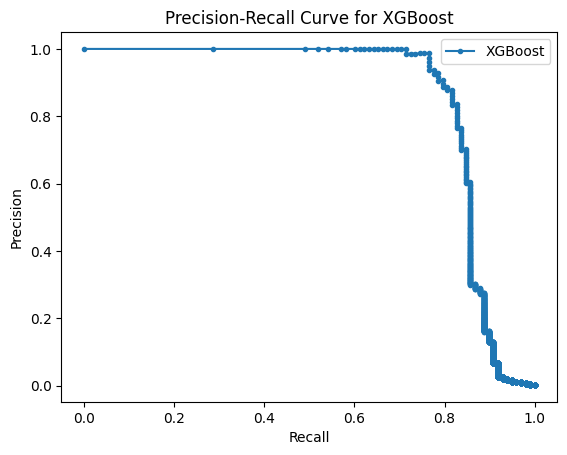

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train XGBoost model
xgb = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
                     use_label_encoder=False,
                     eval_metric='logloss',
                     random_state=42)

xgb.fit(X_train_smote, y_train_smote)  # Train the model

precision, recall, _ = precision_recall_curve(y_test, xgb.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend()
plt.show()